# Bài 2: Gradient Descent và Linear Regression

Trong bài thực hành này, chúng ta sẽ 
- giải linear regression bằng Gradient Descent


## 1. Gradient Descent

In [1]:
import pandas as pd
df = pd.read_csv("House_Price.csv")        ## load file csv vào pd.DataFrame

In [2]:
df                 ## xem thử DataFrame

,Size in feet squared,Price in thousand dollar
0,2497,729
1,1627,617
2,576,290
3,2156,728
4,1154,453
...,...,...
95,579,207
96,1551,368
97,2243,514
98,803,372


Text(0, 0.5, 'Price in thousand dollar')

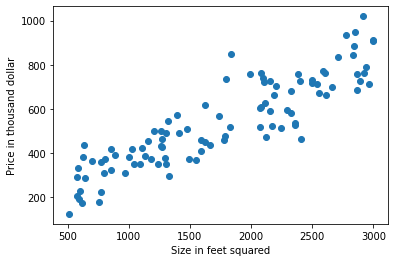

In [3]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

Bây giờ chúng ta muốn làm một bài toán dựa vào kích thước của ngôi nhà, đoán giá tiền

- $X$ = diện tích ngôi nhà

- $y$ = giá tiền (chưa biết, muốn dự đoán)

Ta giả thiết $\hat{y} = aX + b$  với $a$ và $b$ là số thực

Ta tìm $a$ và $b$ sao cho trung bình bình phương sai số nhỏ nhất khi đoán, tức là tìm $a$ và $b$ sao cho

$$ L = \frac{1}{n} \sum (y-\hat{y})^2 =  \frac{1}{n} \sum (y - aX - b)^2 $$

đạt giá trị nhỏ nhất, với $n$ là số mẫu.

Đặt $\lambda$ là learning rate, giá trị $a$ và $b$ sẽ được cập nhật theo công thức:

 - $a = a - \lambda \frac{\partial L}{\partial a} = a - \lambda \frac{\partial}{\partial a} \left( \frac{1}{n} \sum (y - aX - b)^2 \right)
= a - 2 \lambda  \frac{1}{n} \sum (y - aX - b) (-X) $

- $b = b - \lambda \frac{\partial L}{\partial b} = b - \lambda \frac{1}{n} \frac{\partial}{\partial b} \left( \sum (y - aX - b)^2 \right)
= b - 2 \lambda  \frac{1}{n} \sum (y - aX - b) (-1) $

Với $X$, $y$ là các ma trận với mỗi hàng là một sample. Tức là trong bài toán này, mỗi hàng của $X$ là diện tích của một căn nhà, tương ứng hàng của $y$ là giá của nhà đó.
Khi đó bài toán Linear Regression có thể code thành
```python
a = a - lmda * 2 *np.mean((y-a*X-b)*(-X))
a = a - lmda * 2 *np.mean((y-a*X-b)*(-1))
```

Cụ thể, bài toán được lập trình như sau

In [4]:
X = df['Size in feet squared'].values   
X = X.reshape(-1, 1)                   
y = df['Price in thousand dollar'].values 
y = y.reshape(-1,1)


In [5]:
import numpy as np

a, b = 1.0, 100.0                               ## khởi tạo a, b

n_iter = 10000                                  ## số vòng lặp cập nhật a, b
lmda = 0.0000001                                ## learning rate
for ii in range(n_iter):
    error = y - a*X-b
    a = a - 2* lmda * np.mean(error*(-X))       ## cập nhật a và b
    b = b - 2* lmda * np.mean(error*(-1))
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - a*X-b))
        print("Loss at iter {}: {}".format(ii, loss))
loss = np.mean(np.square(y - a*X-b))
print("Final loss: ", loss)

Loss at iter 0: 163043.0689746898
Loss at iter 1000: 8650.560799446657
Loss at iter 2000: 8650.552741546615
Loss at iter 3000: 8650.544684154267
Loss at iter 4000: 8650.536627269585
Loss at iter 5000: 8650.528570892531
Loss at iter 6000: 8650.52051502308
Loss at iter 7000: 8650.512459661195
Loss at iter 8000: 8650.504404806845
Loss at iter 9000: 8650.496350459996
Final loss:  8650.488304674207


In [6]:
error.shape, X.shape

((100, 1), (100, 1))

Text(0, 0.5, 'Price in thousand dollar')

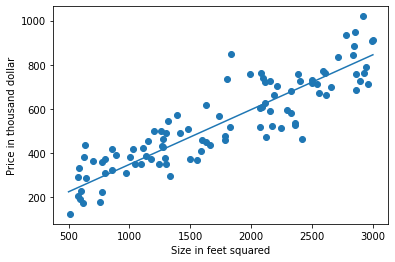

In [7]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), a*np.arange(500, 3000) + b)   ## vẽ solution tìm được
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

In [8]:
g_a, g_b = a, b

### Viết gọn hơn xíu

Cho $X$ là vector cột, $Z = (X, 1)$ là ma trận với 2 cột là $X$ và 1, khi đó $\hat{y} = aX + b =  Z \theta$ với $\theta = (a,b)^T$. Bài toán chuyển thành tìm $\theta$ sao cho

   $$ L = \frac{1}{n} ( y - Z \theta )^T ( y - Z \theta )$$
    
nhỏ nhất. Khi đó
$$ \frac{\partial L}{\partial \theta} = \frac{2}{n} (-Z)^T (y-Z \theta)
$$

In [9]:
X = df['Size in feet squared'].values   
X = X.reshape(-1, 1)                   
y = df['Price in thousand dollar'].values 
y = y.reshape(-1,1)


In [10]:
import numpy as np
Z = np.concatenate([X, np.ones((X.shape[0],1))], axis=-1) ## thêm một cột toàn số 1

In [11]:
theta = np.asarray([[1.0], [100.0]])     ## khởi tạo theta

n_iter = 10000           ## số vòng lặp cập nhật theta
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - np.matmul(Z, theta)
    theta =  theta - 2/Z.shape[0]*lmda*np.matmul(-Z.T, error)   ##cập nhật theta
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - np.matmul(Z, theta)))
        print("Loss at iter {}: {}".format(ii, loss))

loss = np.mean(np.square(y - np.matmul(Z,theta)))
print("Final loss: ", loss)
print("Final theta: ", theta)

Loss at iter 0: 163043.0689746897
Loss at iter 1000: 8650.560799446657
Loss at iter 2000: 8650.552741546615
Loss at iter 3000: 8650.544684154267
Loss at iter 4000: 8650.536627269585
Loss at iter 5000: 8650.528570892533
Loss at iter 6000: 8650.52051502308
Loss at iter 7000: 8650.512459661195
Loss at iter 8000: 8650.504404806843
Loss at iter 9000: 8650.496350459996
Final loss:  8650.488304674207
Final theta:  [[  0.24853945]
 [100.00861344]]


### 1.1 So sánh với exact solution và Sklearn

In [12]:

## exact solution
import numpy as np
Z = np.concatenate([X, np.ones((100,1))], axis=-1)   
Z = Z.astype(np.float64)       

## giá trị a và b tìm được
T = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)
e_a, e_b = T[0][0], T[1][0]
print(e_a, e_b)

0.23481102424914324 128.49450039983012


In [13]:
## SkLearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)                ## train LinearRegression 
sk_a, sk_b = lr.coef_[0][0], lr.intercept_[0]    ## lấy các tham số học được
print("a = {}, b = {}".format(sk_a, sk_b))

a = 0.23481102424914332, b = 128.4945003998301


In [14]:
print("GD MSE: ", np.mean(np.square(y - g_a*X-g_b)))
print("Exact SOl MSE: ", np.mean(np.square(y - e_a*X-e_b)))
print("SK MSE: ", np.mean(np.square(y - sk_a*X-sk_b)))

GD MSE:  8650.488304674207
Exact SOl MSE:  8522.669588077446
SK MSE:  8522.669588077446


Text(0, 0.5, 'Price in thousand dollar')

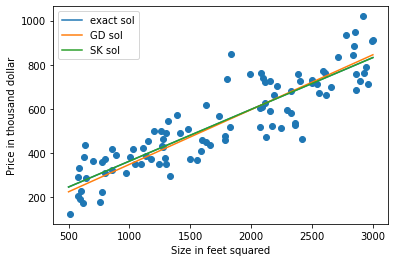

In [15]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), e_a*np.arange(500, 3000) + e_b, label="exact sol") 
plt.plot(np.arange(500, 3000), g_a*np.arange(500, 3000) + g_b, label="GD sol")   
plt.plot(np.arange(500, 3000), sk_a*np.arange(500, 3000) + sk_b, label="SK sol")   
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Bài tập
Cho dữ liệu gồm 100 hàng, gồm chiều rộng, chiều dài và giá của một ngôi nhà, hay xây dựng một mô hình dư đoán giá nhà dựa vào chiều dài và rộng với giả thuyết
$$ \text{giá} = a * \text{rộng} + b* \text{dài} + c , a, b, c \in \mathbb{R}$$
- Dùng Gradient Descent giải Linear Regression cho bài toán này 
    - khởi tạo tham số, chỉnh số vòng lặp và learning rate cho phù hợp
    - Hint:  để GD dễ hội tụ hơn nên Normalization input trước
- So sánh kết quả (MSE) với Exact Solution và kết quả từ Sklearn

## Nộp bài
- Code và chạy kết quả lưu vào file notebook NMMH_TH2_MSSV.ipynb (notebook phải có kết quả chạy nếu ko xem như chưa làm)
- Nén thành file NMMH_TH2_MSSV.rar (.zip) và nộp về: dinhvietcuong1996@gmail.com
- Deadline: 23g59 thứ 3 ngày 02/06/2020. Nộp trễ bị chia đôi số điểm.

In [16]:
# Import dependencies libraries
# Import numpy
import numpy as np 
# Import pandas
import pandas as pd
# Import matplotlib.pylot
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

In [17]:
## Read input data
house_price = pd.read_csv('House_Price_2.csv')
house_price.head()

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08


In [18]:
house_price.shape

(100, 3)

In [19]:
house_price.describe(include='all')

,width,length,price
count,100.000000,100.000000,1.000000e+02
mean,16.910000,59.770000,2.046623e+08
std,7.254528,22.784832,6.439491e+07
min,5.000000,20.000000,7.257961e+07
25%,11.000000,39.000000,1.583727e+08
50%,16.000000,60.500000,1.951909e+08
75%,23.000000,79.000000,2.513378e+08
max,29.000000,97.000000,3.377315e+08


In [20]:
# Checking Null values
house_price.isnull().sum()*100/house_price.shape[0]
# There are no NULL values in the dataset, hence it is clean.

width     0.0
length    0.0
price     0.0
dtype: float64

In [21]:
for column in house_price.columns:
    print(column, len(house_price[str(column)].unique()))

width 25
length 59
price 100


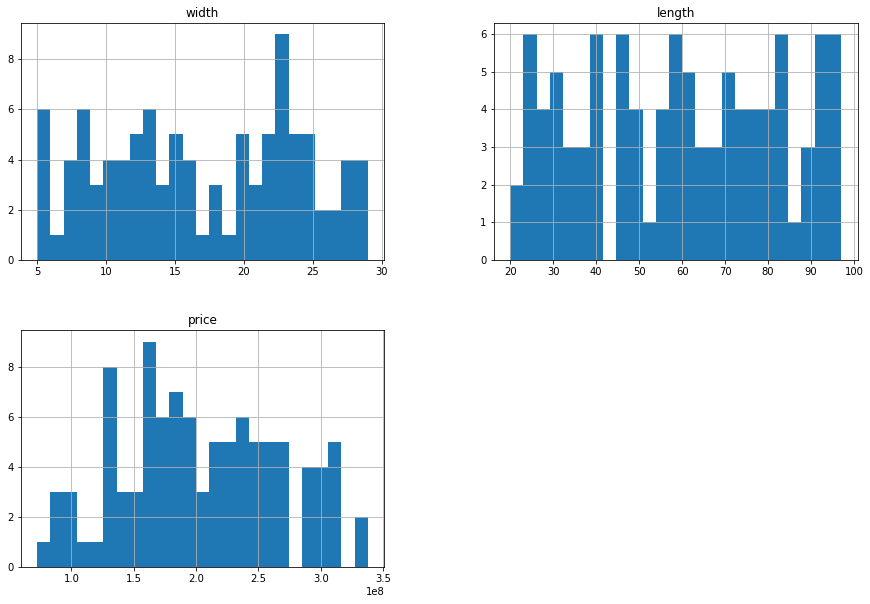

In [22]:
house_price.hist(figsize=(15, 10), bins=25, xlabelsize=10, ylabelsize=10)
plt.show()

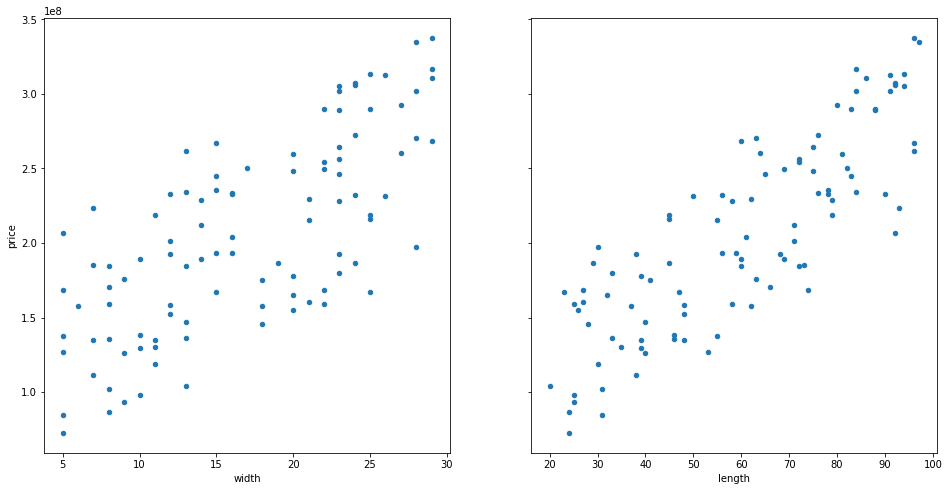

In [23]:
fig, axs = plt.subplots(1, 2, sharey=True)
house_price.plot(kind='scatter', x='width', y='price', ax=axs[0], figsize=(16, 8))
house_price.plot(kind='scatter', x='length', y='price', ax=axs[1])
plt.show()

In [24]:
house_price.price.describe()

count    1.000000e+02
mean     2.046623e+08
std      6.439491e+07
min      7.257961e+07
25%      1.583727e+08
50%      1.951909e+08
75%      2.513378e+08
max      3.377315e+08
Name: price, dtype: float64

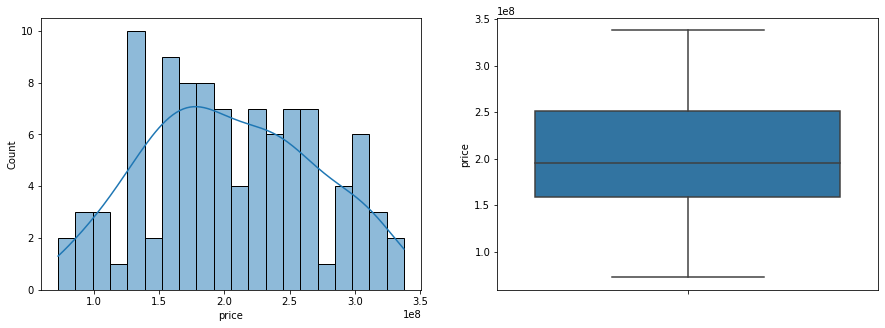

In [25]:
price_fig, price_axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.histplot(house_price['price'], kde=True, bins=20,  ax=price_axs[0])
sns.boxplot(y=house_price['price'], orient='v' ,ax=price_axs[1])
plt.show()

In [26]:
house_price.width.describe()

count    100.000000
mean      16.910000
std        7.254528
min        5.000000
25%       11.000000
50%       16.000000
75%       23.000000
max       29.000000
Name: width, dtype: float64

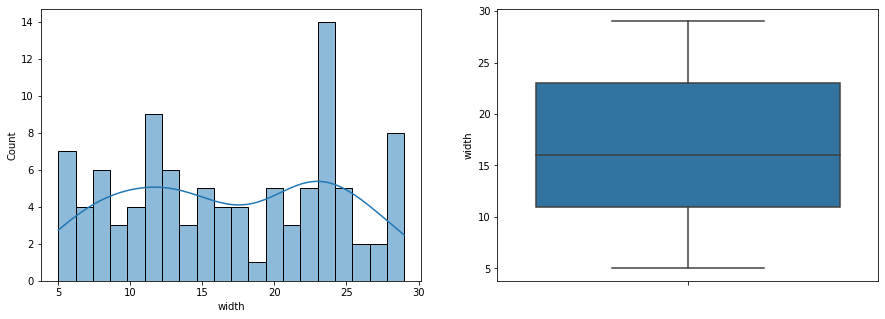

In [27]:
width_fig, width_axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.histplot(house_price['width'], kde=True, bins=20,  ax=width_axs[0])
sns.boxplot(y=house_price['width'], orient='v' ,ax=width_axs[1])
plt.show()

In [28]:
house_price.length.describe()

count    100.000000
mean      59.770000
std       22.784832
min       20.000000
25%       39.000000
50%       60.500000
75%       79.000000
max       97.000000
Name: length, dtype: float64

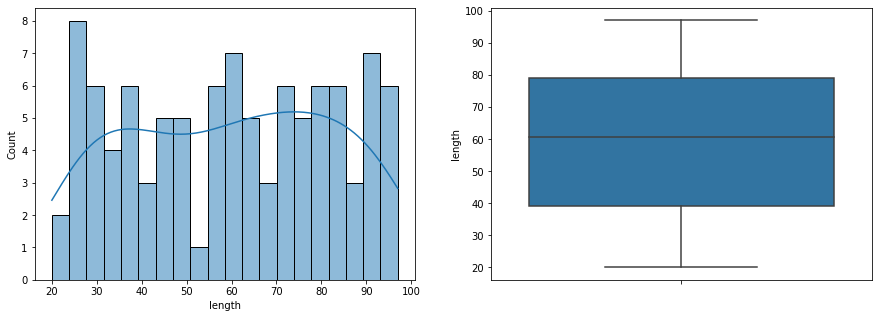

In [29]:
length_fig, length_axs = plt.subplots(ncols = 2, figsize=(15, 5))
sns.histplot(house_price['length'], kde=True, bins=20,  ax=length_axs[0])
sns.boxplot(y=house_price['length'], orient='v' ,ax=length_axs[1])
plt.show()

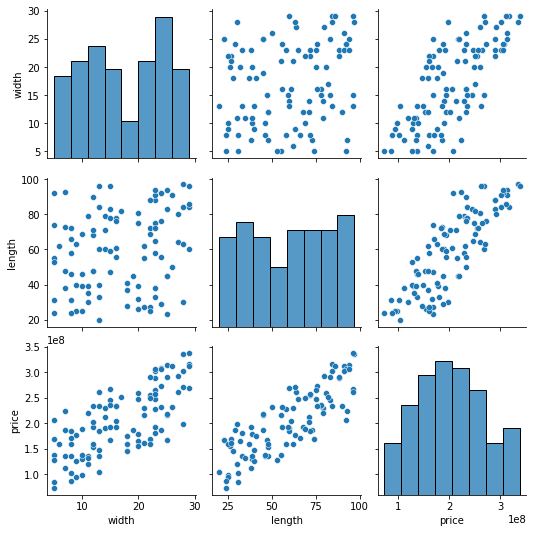

In [30]:
sns.pairplot(house_price)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(house_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
x_train = df_train.drop(['price'], axis=1)
y_train = df_train.price
x_test = df_test.drop(['price'], axis=1)
y_test = df_test.price

In [33]:
x_train.shape, y_train.shape

((70, 2), (70,))

In [34]:
x_test.shape, y_test.shape

((30, 2), (30,))

In [35]:
X = x_train.values
X.shape

(70, 2)

In [36]:
y = y_train.values  
y = y.reshape(-1,1)
y.shape

(70, 1)

In [37]:
Z = np.concatenate([X, np.ones((X.shape[0],1))], axis=-1)
Z = Z.astype(np.float32)
Z.shape

(70, 3)

In [38]:
theta = np.array([[1.0], [1.0], [1.0]])     ## khởi tạo theta

n_iter = 10000           ## số vòng lặp cập nhật theta
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - np.matmul(Z, theta)
    theta =  theta - 2/Z.shape[0]*lmda*np.matmul(-Z.T, error)   ##cập nhật theta
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - np.matmul(Z, theta)))
        print("Loss at iter {}: {}".format(ii, loss))

loss = np.mean(np.square(y - np.matmul(Z,theta)))
print("Final loss: ", loss)
print("Final theta: ", theta)

Loss at iter 0: 4.718724378922115e+16
Loss at iter 1000: 9221075918537638.0
Loss at iter 2000: 2680916277363500.0
Loss at iter 3000: 1527689090996006.5
Loss at iter 4000: 1298658269925881.2
Loss at iter 5000: 1228949489441123.2
Loss at iter 6000: 1187447288276097.8
Loss at iter 7000: 1151653778798722.5
Loss at iter 8000: 1117687284837095.5
Loss at iter 9000: 1084857435193249.1
Final loss:  1053052901096746.2
Final theta:  [[1411352.59304925]
 [2961231.45274218]
 [  57991.92491257]]


In [39]:
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)
w

array([[5003147.8267983 ],
       [1999671.64224388],
       [ 619890.56435069]])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score, accuracy_score
# Mô hình hồi quy tuyến tính
Lin_reg = LinearRegression(fit_intercept=True)
Lin_reg.fit(x_train, y_train)

LinearRegression()

In [41]:
# Hệ số của các đặc trưng, hệ số chặn trong mô hình regression của dữ liệu, điểm số trên tập test
print('Linear regression intercept = ', Lin_reg.intercept_) # hệ số bậc 0
print('Linear regression coefficient = ', Lin_reg.coef_) # hệ số bậc 1
print('Linear regression score on test data = ', Lin_reg.score(x_test, y_test)) #: phương sai

Linear regression intercept =  619797.6890618503
Linear regression coefficient =  [5003155.14387629 1999670.93137573]
Linear regression score on test data =  0.9984827854302862


In [42]:
# Hệ số của các đặc trưng
for i in range(len(x_train.columns)):
    print(x_train.columns[i], ": ", Lin_reg.coef_[i])

width :  5003155.143876295
length :  1999670.9313757333


In [43]:
# Test trên tập huấn luyện
y_train_pred = Lin_reg.predict(x_train)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  3009893.304093722
R2:  0.9975081544061387


In [44]:

# Predict
y_pred = Lin_reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (np.sqrt(mse))
mv = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

output = pd.DataFrame(y_test[0:10])
output['predicted price'] = y_pred[0:10]
output['difference'] = output['predicted price'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print("Mean Absolute Error is", round(mae,1))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("Variance explained by model", round(mv*100,5), "%")

           price  predicted price    difference
37  3.125836e+08     3.126719e+08  8.827832e+04
62  1.374082e+08     1.356175e+08 -1.790715e+06
26  3.133697e+08     3.136677e+08  2.980489e+05
41  2.596031e+08     2.626562e+08  3.053102e+06
35  1.550823e+08     1.526743e+08 -2.408000e+06
25  2.043805e+08     2.026502e+08 -1.730287e+06
36  7.257961e+07     7.362768e+07  1.048070e+06
33  3.021521e+08     3.086805e+08  6.528429e+06
77  1.931637e+08     1.936477e+08  4.840565e+05
21  1.800681e+08     1.816815e+08  1.613368e+06 

Model testing performance:
--------------------------
Mean Absolute Error is 2041406.6
RMSE is 2771401.820192879
R2 score is 0.9984827854302862
Variance explained by model 99.84972 %


In [45]:
print("GD MSE: ", np.mean(np.square(y_test.values - theta[0][0]*x_test.width.values - theta[1][0]*x_test.length.values -theta[2][0])))
print("Exact SOl MSE: ", np.mean(np.square(y - w[0][0]*x_test.width.values - w[1][0]*x_test.length.values - w[2][0])))
print("SK MSE: ", np.mean(np.square(y - Lin_reg.coef_[0]*x_test.width.values - Lin_reg.coef_[1]*x_test.length.values - -Lin_reg.intercept_)))

GD MSE:  574741825968698.4
Exact SOl MSE:  8927019684187739.0
SK MSE:  8962776781899799.0
